# 1. Hipótese: O Aumento da Renda Aumenta a Demanda por Energia

A relação entre o consumo de energia e o crescimento econômico tem sido um tópico de grande interesse e relevância no âmbito das pesquisas sobre desenvolvimento sustentável e políticas energéticas. Neste estudo, buscamos explorar e quantificar a correlação entre o consumo de energia primária e o Produto Interno Bruto (PIB) per capita, representando, respectivamente, a demanda por energia e o nível de renda de uma nação.<br>

A fundamentação teórica apoia-se no conceito de que, à medida que a renda de um país aumenta, seu consumo de energia tende a crescer, impulsionado por uma maior demanda industrial, comercial e doméstica, o que por conseguinte, exige um maior uso de energia. A energia é um pilar fundamental para o desenvolvimento econômico, e um aumento na renda per capita geralmente reflete em um aumento no padrão de vida e, consequentemente, em um maior consumo de energia.<br>

Usando o modelo Cobb-Douglas, para desecrever a produção - sendo energia como um elemento vinculado à K - e o princípio de equilíbrio do mercado, temos que um maior consumo, acarretado pelo crescimento da renda, aumenta a produção. No longo prazo, onde K será variável, isso implica em mais energia dispendida na fabricação e disponibilização de bens e serviços. <br>

\begin {equation}
Y = A \cdot K^{\alpha} \cdot L^{\beta}
\end {equation}

Neste estudo, o modelo de demanda por energia examina a relação entre o PIB e o consumo de energia. A ideia central é que a demanda por energia não é apenas uma função do tamanho e do crescimento da economia, mas também de outros fatores como a eficiência energética, políticas governamentais, avanços tecnológicos e mudanças no comportamento dos consumidores. No entanto, o foco deste projeto está em entender até que ponto a renda, medida pelo PIB per capita, influencia essa demanda.<br>

**Fonte:** Global Data on Sustainable Energy <br>
https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy 

# 2. Carga das Ferramentas

In [23]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [24]:
# Carregando o dataset
path_dataset = r'https://raw.githubusercontent.com/Felipefalex/Projeto-Sustainable-Energy/main/global-data-on-sustainable-energy%20(1).csv'
data = pd.read_csv(path_dataset)

# Exibindo as primeiras linhas do dataset para inspeção inicial
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# 3. Análise dos Dados

A primeira fase do projeto é a análise da estrutura dos dados: quais são as informações disponíveis, como estão elencadas e qual seu comportamento.

In [25]:
# Tamanho do dataset e tipos de dados de cada coluna
dataset_info = data.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [26]:
# Quantidade e nome dos países
nomes_paises = data['Entity'].unique()
quantidade_paises = len(data['Entity'].unique())

print('Temos', quantidade_paises, 'em nosso dataframe, sendo a lista completa deles: \n', nomes_paises)

Temos 176 em nosso dataframe, sendo a lista completa deles: 
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Keny

In [27]:
# Dataframe reduzido
colunas_reduzidas = ['Entity', 'Year', 'Primary energy consumption per capita (kWh/person)', 'gdp_per_capita']
data = data[colunas_reduzidas]

# Alterando o nome das colunas
data.columns = ['Pais', 'Ano', 'Consumo energia primaria per capita', 'PIB per capita']

In [28]:
# Avaliando a quantidade de valores nulos
nulos = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
nulos = nulos.rename(columns = {0 : 'Null Values'})
print(nulos)

                                     Null Values
PIB per capita                               282
Pais                                           0
Ano                                            0
Consumo energia primaria per capita            0


In [29]:
# Calculando o número de informações faltantes por país para cada coluna de interesse
colunas_interesse = ['Pais', 'Ano', 'Consumo energia primaria per capita', 'PIB per capita']
valores_faltantes_pais = data[colunas_interesse].isnull().sum(axis=1).groupby(data['Pais']).sum()
valores_faltantes_pais = valores_faltantes_pais.sort_values(ascending=False)

# Exibindo o total de dados faltantes por coluna
print(valores_faltantes_pais.head(20))

Pais
Saint Vincent and the Grenadines    21
Kyrgyzstan                          21
Yemen                               21
Gambia                              21
Saint Kitts and Nevis               21
Egypt                               21
Saint Lucia                         21
Czechia                             21
Bahamas                             21
Congo                               21
Slovakia                            21
Somalia                             13
Nauru                               10
Eritrea                              9
Cayman Islands                       6
South Sudan                          5
Afghanistan                          2
Aruba                                2
French Guiana                        1
New Caledonia                        1
dtype: int64


In [30]:
# Remoção das informações faltantes
# Lista de países a serem removidos
paises_a_remover = [
    "Egypt", "Saint Vincent and the Grenadines", "Saint Lucia", 
    "Saint Kitts and Nevis", "Gambia", "Bahamas", "New Caledonia", 
    "Czechia", "Kyrgyzstan", "Slovakia", "Congo", "Yemen", 
    "Cayman Islands", "Somalia", "Aruba", "Bulgaria", "Bermuda", 
    "Puerto Rico", "Lebanon", "Libya", "Albania", "Eritrea", 
    "Nauru", "Djibouti"
]

# Removendo os países especificados do dataframe
data = data[~data['Pais'].isin(paises_a_remover)]

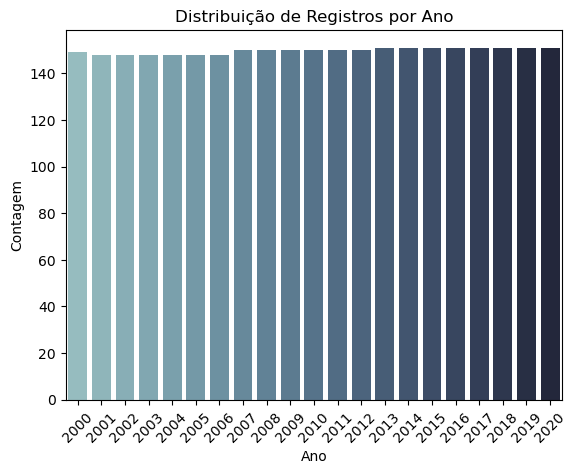

,count,mean,std,min,25%,50%,75%,max
Ano,3145.0,2010.0,6.0,2000.0,2005.0,2010.0,2015.0,2020.0
Consumo energia primaria per capita,3145.0,26190.0,36677.0,0.0,2854.0,12646.0,32416.0,262586.0
PIB per capita,3135.0,12533.0,18501.0,112.0,1290.0,4331.0,14706.0,123514.0


In [31]:
# Estatísticas descritivas das variáveis numéricas
estatisticas_numericas = data.describe().round(0).T

# Visualização da distribuição das principais variáveis categóricas
# Distribuição de registros por ano
cores_anos = sns.cubehelix_palette(21, rot=-.25, light=.7)
sns.countplot(x=data['Ano'], palette=cores_anos)
plt.title('Distribuição de Registros por Ano')
plt.ylabel('Contagem')
plt.xlabel('Ano')
plt.xticks(rotation=45)

plt.show()

estatisticas_numericas

`Ano`: Os dados abrangem de 2000 a 2020. A distribuição de registros por ano é bastante uniforme, indicando que a maioria dos anos tem uma quantidade similar de dados.<br>
`Consumo de Energia Primária Per Capita`: Os dados variam significativamente entre os países.<br>

In [32]:
# Definindo as variáveis chave para uso futuro no código
variáveis_chave = ['Consumo energia primaria per capita', 'PIB per capita']

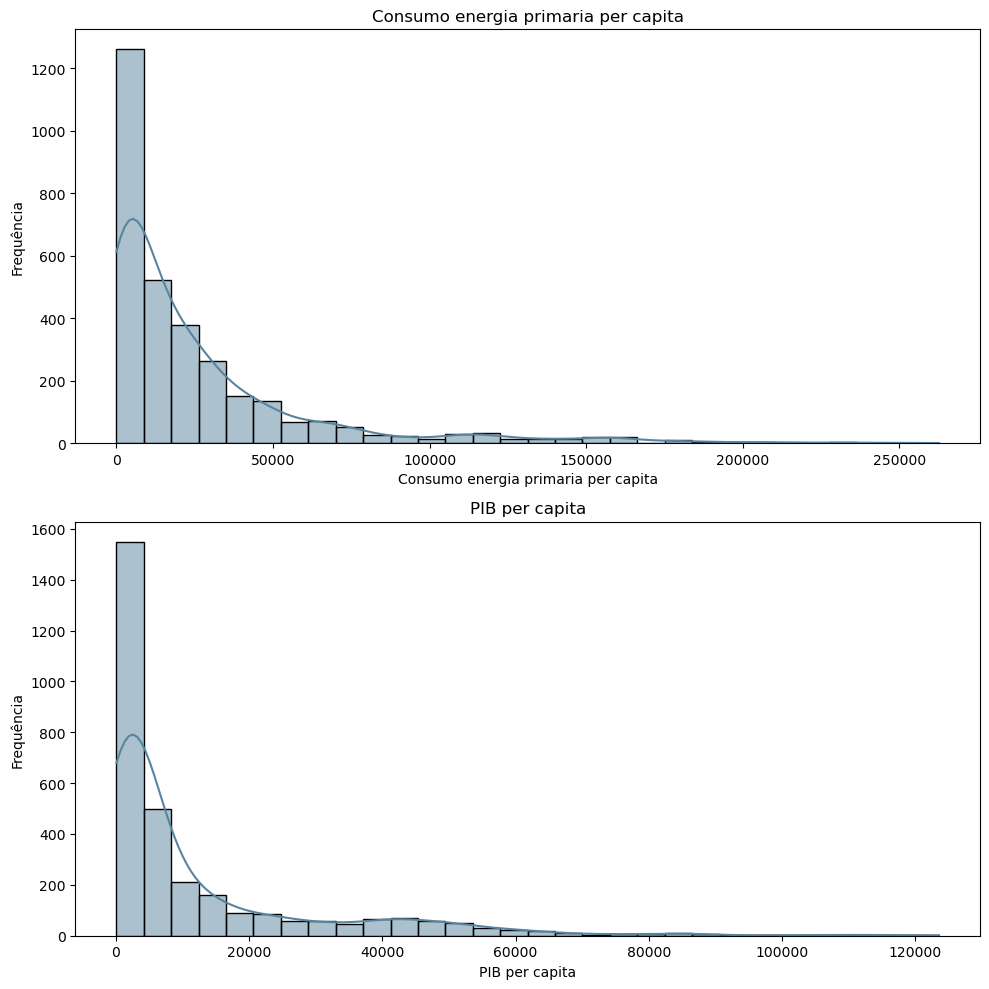

In [33]:
# Visualização Gráfica das Principais Variáveis
# Criando histogramas para cada variável selecionada
cores_hist = sns.cubehelix_palette(rot=-.25, light=.7)
fig, axes = plt.subplots(len(variáveis_chave), 1, figsize=(10, 5 * len(variáveis_chave)))

for i, col in enumerate(variáveis_chave):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True, color=cores_hist[2])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

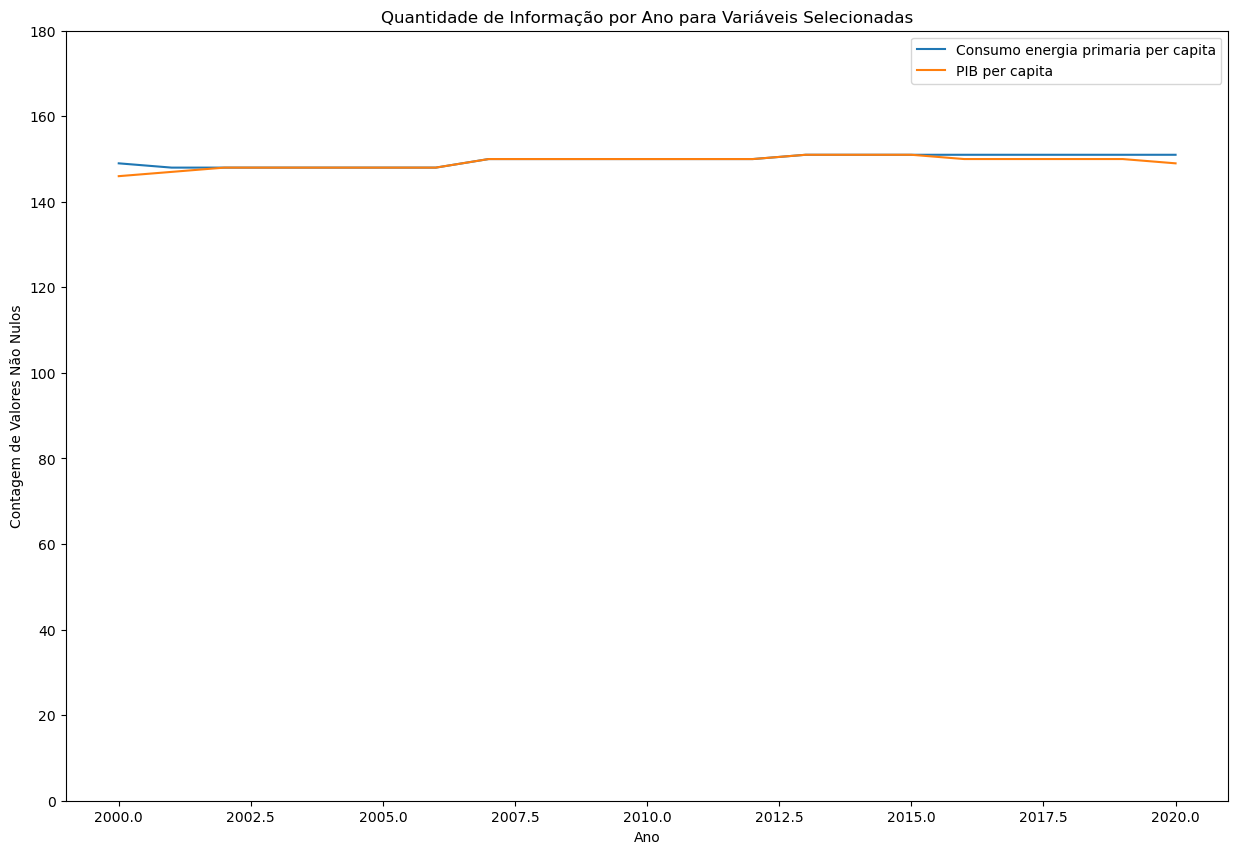

In [34]:
# Contagem de informações não nulas por ano para cada variável
contagem_info = data.groupby('Ano')[variáveis_chave].count()

# Plotando o gráfico
plt.figure(figsize=(15, 10))
for var in variáveis_chave:
    plt.plot(contagem_info.index, contagem_info[var], label=var)

plt.xlabel('Ano')
plt.ylabel('Contagem de Valores Não Nulos')
plt.ylim(bottom=0, top=180)
plt.title('Quantidade de Informação por Ano para Variáveis Selecionadas')
plt.legend()
plt.grid(False)
plt.show()

In [35]:
# Calculando a quantidade de informações não nulas por país para as variáveis-chave
quantidade_info_por_pais = data.groupby('Pais')[variáveis_chave].count().sum(axis=1)

# Ordenando os países pela quantidade de informações não nulas, do maior para o menor
paises_por_quantidade_info = quantidade_info_por_pais.sort_values(ascending=False)

# Exibindo os resultados
print(paises_por_quantidade_info)

Pais
Lesotho          42
Portugal         42
Nepal            42
Netherlands      42
New Zealand      42
                 ..
Afghanistan      40
Serbia           28
Montenegro       28
South Sudan      11
French Guiana     1
Length: 152, dtype: int64


C:\Users\Felipe\AppData\Local\Temp\ipykernel_41456\3550177258.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


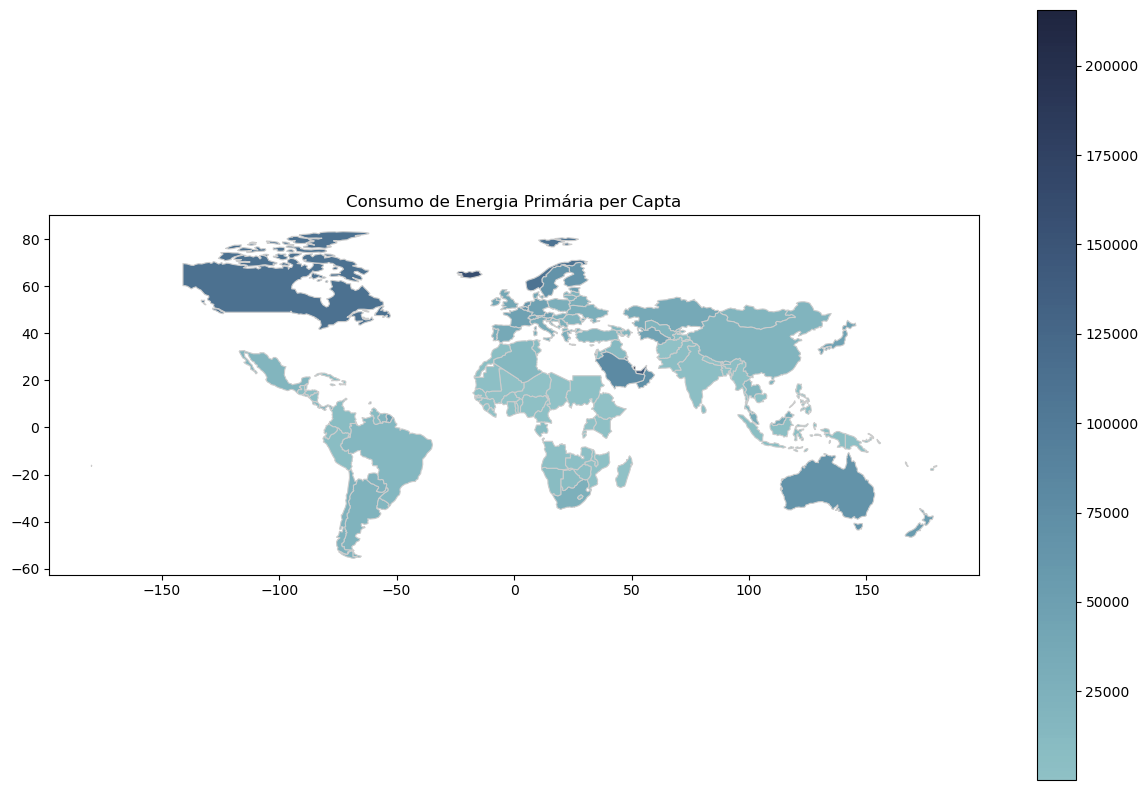

In [36]:
# Análise do PIB per capita por país
# Carregando um mapa mundial
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculando a média do uso de energia primária per capta por país
media_uso_energia_primaira_per_capta = data.groupby('Pais')['Consumo energia primaria per capita'].mean()
uso_energia_mundial = mundo.set_index('name').join(media_uso_energia_primaira_per_capta)

cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)

# Plotando o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
uso_energia_mundial.plot(column='Consumo energia primaria per capita',
                            cmap=cores_mapa,
                            linewidth=0.8,
                            ax=ax,
                            edgecolor='0.8',
                            legend=True)
ax.set_title('Consumo de Energia Primária per Capta')
plt.show()

C:\Users\Felipe\AppData\Local\Temp\ipykernel_41456\2718282595.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


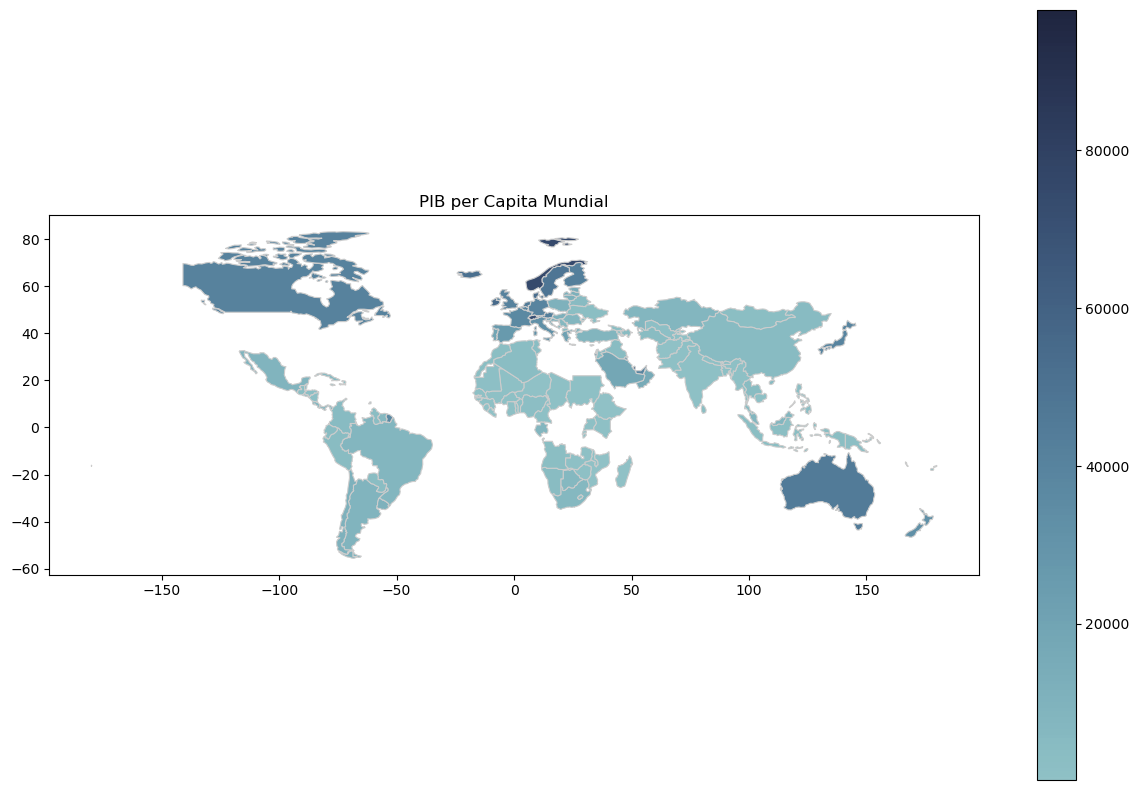

In [37]:
# Carregando um mapa mundial
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculando a média do PIB per capta
media_pib_per_capta = data.groupby('Pais')['PIB per capita'].mean()
pib_per_capta_mundial = mundo.set_index('name').join(media_pib_per_capta)

cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)

# Plotando o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
pib_per_capta_mundial.plot(column='PIB per capita',
                            cmap=cores_mapa,
                            linewidth=0.8,
                            ax=ax,
                            edgecolor='0.8',
                            legend=True)
ax.set_title('PIB per Capita Mundial')
plt.show()

# 4. Verificação da Hipótese - Premissas

In [38]:
# Segregação de países emergentes e desenvolvidos
emergentes_list = ['Brazil', 'India', 'China', 'Russia', 'South Africa', 'Mexico', 'Indonesia', 'Saudi Arabia', 'Turkey', 'Argentina', 'Thailand']
desenvolvidos_list = ['United States', 'Japan', 'Germany', 'United Kingdom', 'France', 'Canada', 'Italy', 'Australia', 'Netherlands', 'Switzerland', 'Sweden']

emergentes = data[data['Pais'].isin(emergentes_list)].reset_index(drop=True)
desenvolvidos = data[data['Pais'].isin(desenvolvidos_list)].reset_index(drop=True)

# 4. Verificação da Hipótese - Correlação

Vamos começar a investigação dos dados fazendo uma análise de correlação entre o `Percentual de Energia Renovável` o  `PIB per capta` e o `Crescimento do PIB` 

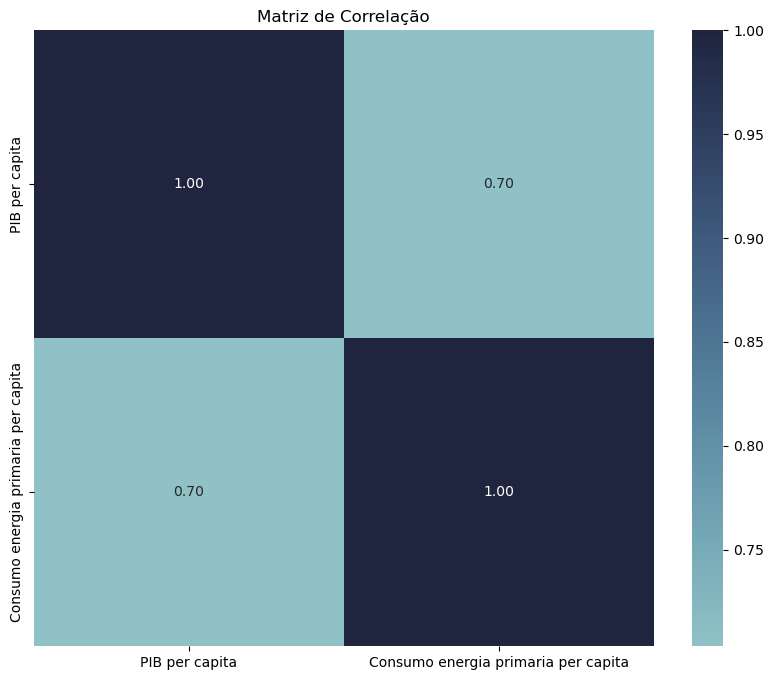

In [39]:
# Matriz de correlação
matriz_correlacao = data[['PIB per capita', 'Consumo energia primaria per capita']].corr()

# Criando matrizes de correlação
cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap=cores_mapa, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

A matriz sugere correlação positiva forte entre as variáveis, ou seja, ambos tendem a oscilar no mesmo sentido <br>

# 4. Verificação da Hipótese - Regressão Linear

In [40]:
# Filtrando o dataset para os últimos 5 anos (2014-2019)
data_recente = data[data['Ano'] >= 2014]

# Variável independente
x_var = 'PIB per capita'

# Variável dependente
y_var = 'Consumo energia primaria per capita'

# Preparando os dados
data_filtrada = data_recente[[x_var, y_var, 'Pais']].dropna()

data_filtrada['Status'] = data_filtrada['Pais'].apply(lambda x: 'Emergente' if x in emergentes_list else ('Desenvolvido' if x in desenvolvidos_list else 'Outro'))

# Filtrando apenas emergentes e desenvolvidos
data_filtrada = data_filtrada[data_filtrada['Status'] != 'Outro']

# Criando e ajustando o modelo
X = data_filtrada[[x_var]]
y = data_filtrada[y_var]
model = LinearRegression()
model.fit(X, y)

# Coeficiente beta
beta = model.coef_[0]

# Fazendo previsões
y_pred = model.predict(X)

# Calculando R²
r2 = r2_score(y, y_pred)

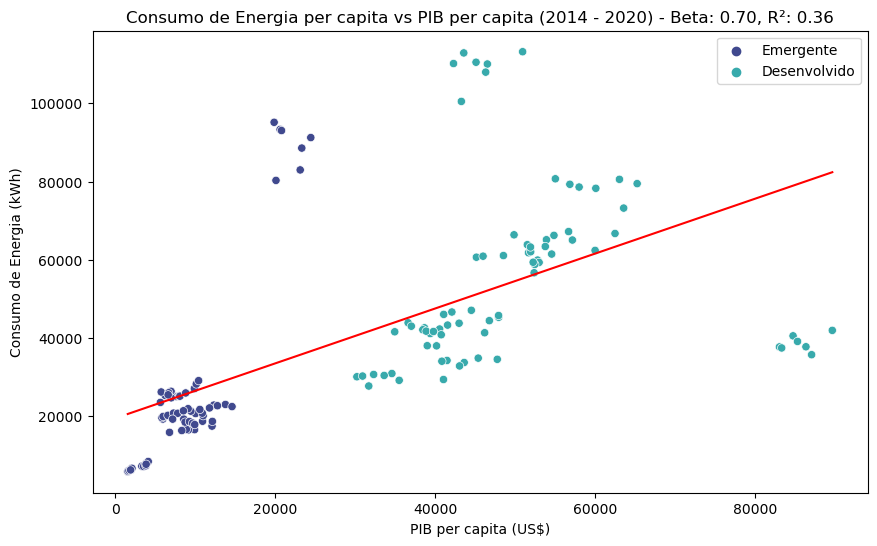

In [41]:
# Plotando gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[x_var], y=y, hue=data_filtrada['Status'], palette='mako')
sns.lineplot(x=X[x_var], y=y_pred, color='red')
plt.title(f'Consumo de Energia per capita vs PIB per capita (2014 - 2020) - Beta: {beta:.2f}, R²: {r2:.2f}')
plt.xlabel('PIB per capita (US$)')
plt.ylabel('Consumo de Energia (kWh)')
plt.show()

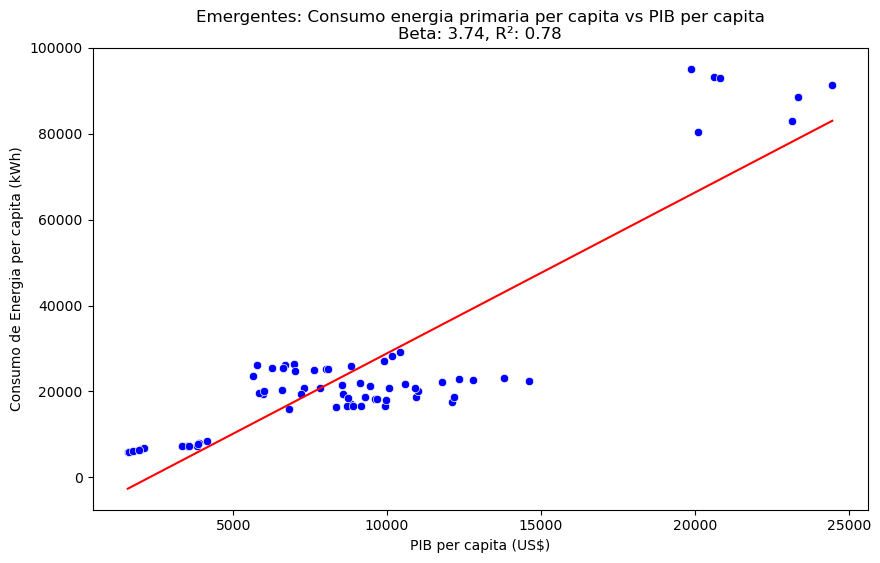

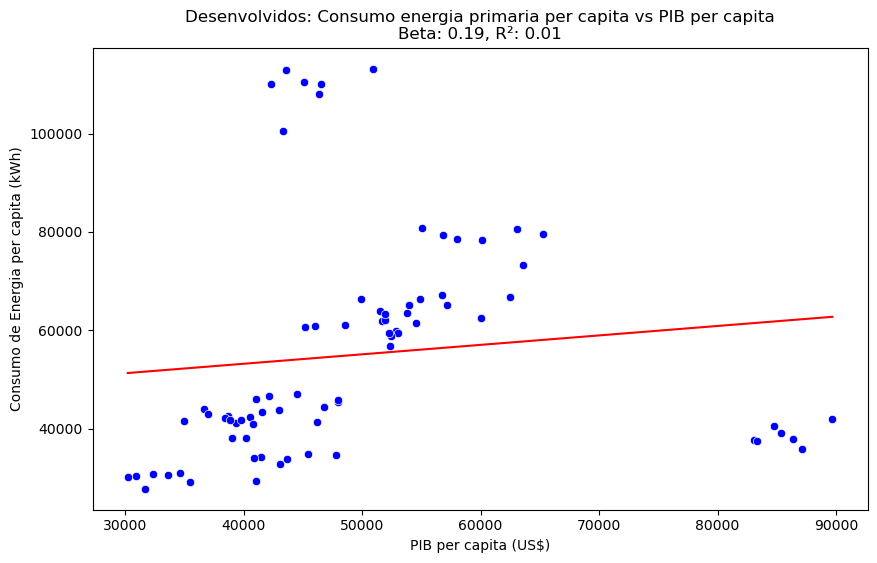

In [42]:
# Função para plotar a regressão, onde data será o dataframe e grupo, o grupo requerido
def plot_regression(data, grupo):
    X = data[[x_var]]
    y = data[y_var]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    beta = model.coef_[0]
    r2 = r2_score(y, y_pred)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[x_var], y=y, color='blue')
    sns.lineplot(x=X[x_var], y=y_pred, color='red')
    plt.title(f'{grupo}: {y_var} vs {x_var}\nBeta: {beta:.2f}, R²: {r2:.2f}')
    plt.xlabel('PIB per capita (US$)')
    plt.ylabel('Consumo de Energia per capita (kWh)')
    plt.show()

# Plotando regressão para países emergentes
data_emergentes = data_filtrada[data_filtrada['Status'] == 'Emergente']
plot_regression(data_emergentes, 'Emergentes')

# Plotando regressão para países desenvolvidos
data_desenvolvidos = data_filtrada[data_filtrada['Status'] == 'Desenvolvido']
plot_regression(data_desenvolvidos, 'Desenvolvidos')

# 4. Verificação da Hipótese - Análise Temporal

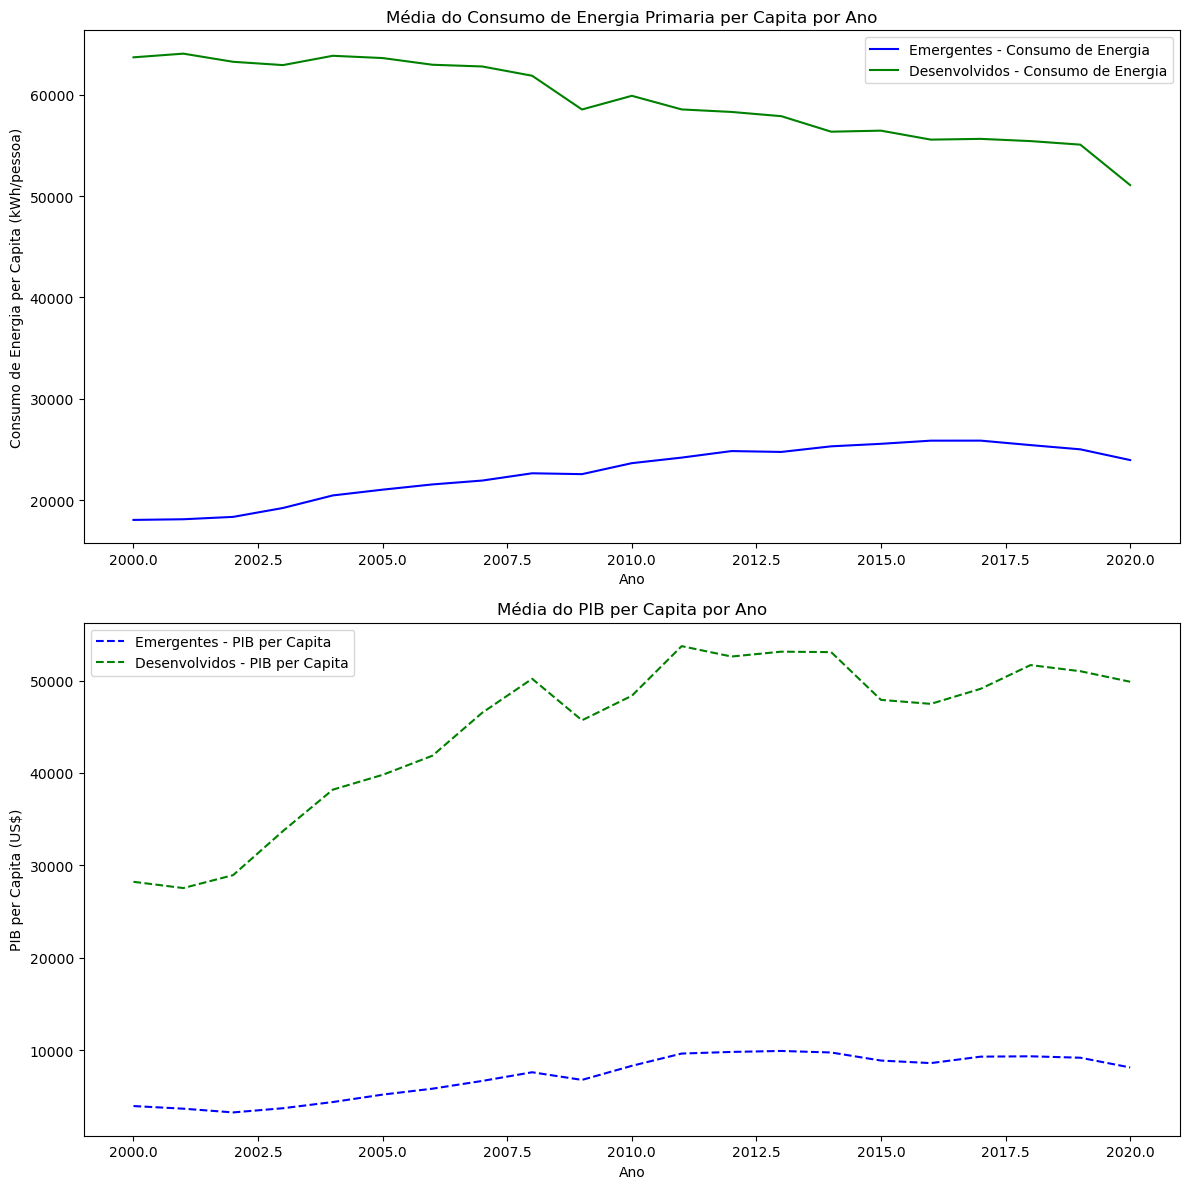

In [43]:
# Filtrando os dados para emergentes e desenvolvidos
data_emergentes = data[data['Pais'].isin(emergentes_list)]
data_desenvolvidos = data[data['Pais'].isin(desenvolvidos_list)]

# Calculando a média do PIB por ano para cada grupo
media_pib_emergentes = data_emergentes.groupby('Ano')['PIB per capita'].mean()
media_pib_desenvolvidos = data_desenvolvidos.groupby('Ano')['PIB per capita'].mean()

# Calculando a média do consumo de energia por ano para cada grupo
media_consumo_emergentes = data_emergentes.groupby('Ano')['Consumo energia primaria per capita'].mean()
media_consumo_desenvolvidos = data_desenvolvidos.groupby('Ano')['Consumo energia primaria per capita'].mean()

# Criando o gráfico com dois subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Gráfico para o consumo de energia per capita
ax[0].plot(media_consumo_emergentes, label='Emergentes - Consumo de Energia', color='blue')
ax[0].plot(media_consumo_desenvolvidos, label='Desenvolvidos - Consumo de Energia', color='green')
ax[0].set_title('Média do Consumo de Energia Primaria per Capita por Ano')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Consumo de Energia per Capita (kWh/pessoa)')
ax[0].legend()
ax[0].grid(False)

# Gráfico para o PIB per capita
ax[1].plot(media_pib_emergentes, label='Emergentes - PIB per Capita', color='blue', linestyle='--')
ax[1].plot(media_pib_desenvolvidos, label='Desenvolvidos - PIB per Capita', color='green', linestyle='--')
ax[1].set_title('Média do PIB per Capita por Ano')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('PIB per Capita (US$)')
ax[1].legend()
ax[1].grid(False)

plt.tight_layout()
plt.show()

plt.show()

# 5. Conclusões